In [21]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Read and prepare data

In [25]:
data = pd.read_excel('./Inflation.xls')
data
_2datetime = lambda x: datetime.strptime(x.split('***')[0], '%Y/%m')
ts_1 = pd.DataFrame(data[data.columns[-1]][2:][:-4]).rename(columns={'Unnamed: 5': 'CPI same-month-previous-year'})
ts_2 = pd.DataFrame(data[data.columns[-2]][2:][:-4]).rename(columns={'Սպառողական գների ինդեքս':'CPI previous-month'})
print(ts_1)
ts_1.index = ts_1.index.map(_2datetime)
ts_2.index = ts_2.index.map(_2datetime)

        CPI same-month-previous-year
2006/1                        102.48
2006/2                       100.249
2006/3                       100.091
2006/4                       100.284
2006/5                       102.403
2006/6                       98.8056
2006/7                       99.3194
2006/8                       99.0575
2006/9                       99.6521
2006/10                      100.179
2006/11                      101.012
2006/12                      101.624
2007/1                       102.405
2007/2                       100.211
2007/3                        99.366
2007/4                       100.125
2007/5                       102.102
2007/6                       99.6925
2007/7                       96.8454
2007/8                       98.5394
2007/9                       100.675
2007/10                      103.129
2007/11                      102.068
2007/12                      101.456
2008/1                       102.354
2008/2                       101.056
2

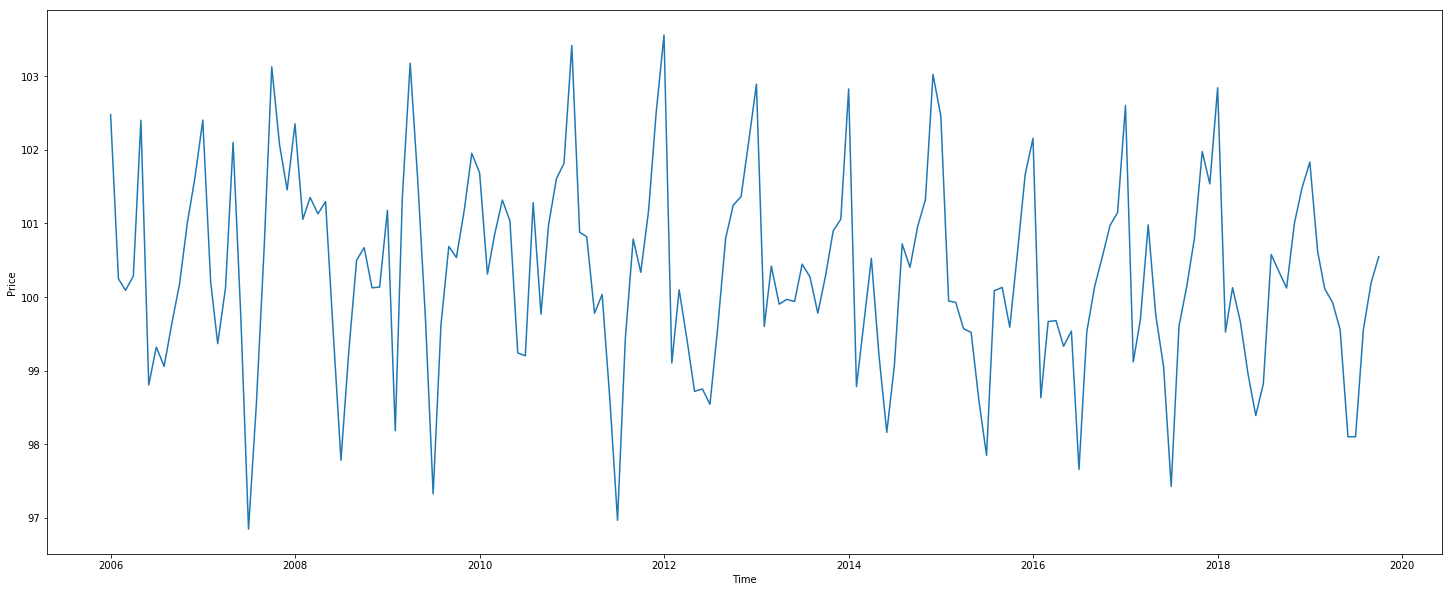

In [5]:
fig = plt.figure(figsize=(25,10))
plt.xlabel('Time')
plt.ylabel('Price')
plt.plot(ts_1)

# Kalman FIlter

In [4]:
from collections import namedtuple
gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__ = lambda s: '𝒩(μ={:.3f}, 𝜎²={:.3f})'.format(s[0], s[1])

def update(prior, measurement):
    x, P = prior        # mean and variance of prior
    z, R = measurement  # mean and variance of measurement
    
    y = z - x        # residual
    K = P / (P + R)  # Kalman gain

    x = x + K*y      # posterior
    P = (1 - K) * P  # posterior variance
    return gaussian(x, P)

def predict(posterior, movement):
    x, P = posterior # mean and variance of posterior
    dx, Q = movement # mean and variance of movement
    x = x + dx
    P = P + Q
    return gaussian(x, P)


In [7]:
process_var = .05**2
voltage_std = .4

x = gaussian(np.mean(ts_1['CPI same-month-previous-year'].values), np.std(ts_1['CPI same-month-previous-year'].values)) # initial state


process_model = gaussian(0., process_var)
N = ts_1.shape[0]
ps = []
estimates = []

for z in ts_1['CPI same-month-previous-year'].values:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, voltage_std**2))

    # save for latter plotting
    estimates.append(x.mean)
    ps.append(x.var)
print(estimates)    

[102.25127560389977, 101.29757864423198, 100.89970311268677, 100.74176318397453, 101.09735065638456, 100.66935267421276, 100.44213891475694, 100.22701008631523, 100.14306437359618, 100.14803187190161, 100.2638706100096, 100.4409211662573, 100.69082958096539, 100.63084983674223, 100.47489842704701, 100.43224897110413, 100.63416800224412, 100.52101366878584, 100.08156069957643, 99.89791694019344, 99.990175971248, 100.36191203730448, 100.56360569537993, 100.66899700496711, 100.86765805835499, 100.88985536811668, 100.94444953199017, 100.96630606652784, 101.00535934066426, 100.82667749279099, 100.46873281389966, 100.32664451012067, 100.34721219020005, 100.3852812280125, 100.35474588542264, 100.32888977732183, 100.42865187417141, 100.16481230226202, 100.30411954121129, 100.64158332326619, 100.75287149621633, 100.6265288920706, 100.23876236412697, 100.16658756373295, 100.22777298051774, 100.26403469724673, 100.37142091316225, 100.55725661794945, 100.68989631926621, 100.64546573214241, 100.668

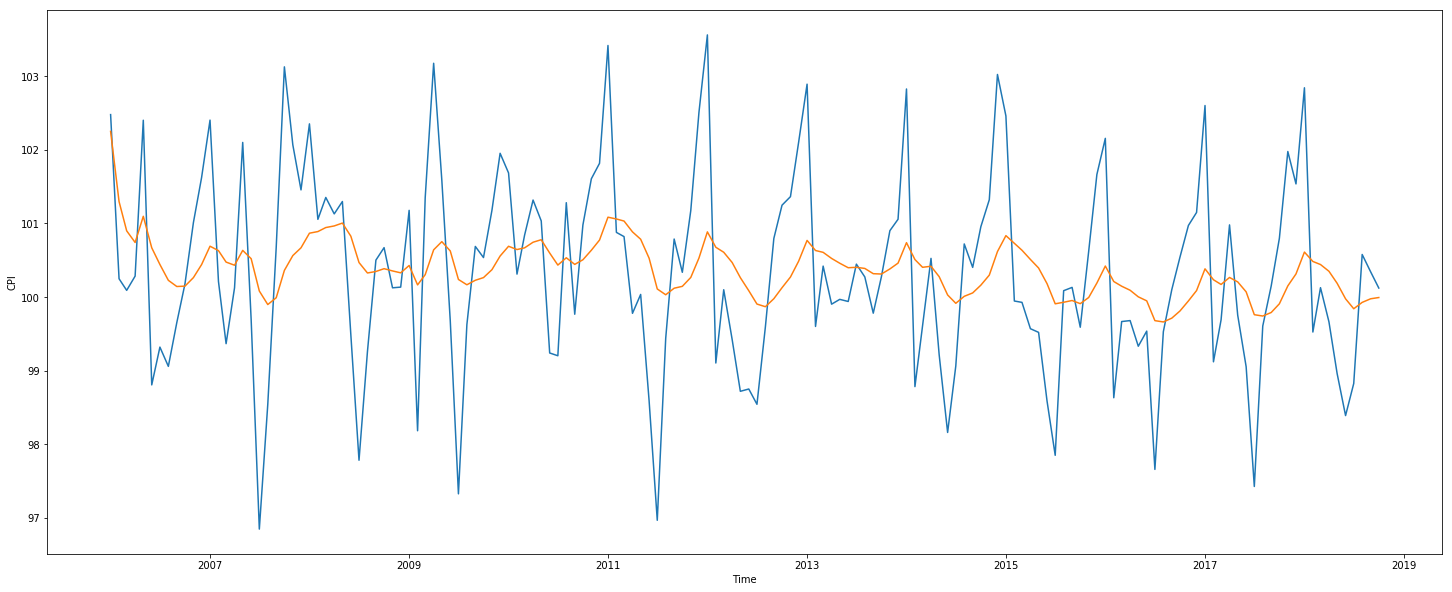

In [8]:
fig = plt.figure(figsize=(25,10))
plt.xlabel('Time')
plt.ylabel('CPI')
plt.plot(ts_1)
plt.plot(ts_1.index,estimates)

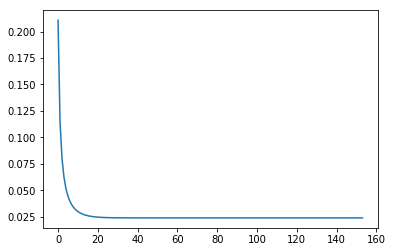

In [24]:
plt.plot(ps)